# Python для сбора данных

*Алла Тамбовцева, НИУ ВШЭ*

## Web-scraping

Мы уже немного познакомились со структурой html-файлов, теперь попробуем выгрузить информацию из реальной страницы, а точнее, с реального сайта [nplus1.ru](https://nplus1.ru/).

**Наша задача:** выгрузить недавние новости в датафрейм `pandas`, чтобы потом сохранить все в csv-файл.

Сначала сгрузим весь html-код страницы и сохраним его в отдельную переменную. Для этого нам понадобится библиотека `requests`. Импортируем её:

In [1]:
import requests

Сохраним ссылку на главную страницу сайта в переменную `url` для удобства и выгрузим страницу. (Разумеется, это будет работать при подключении к интернету. Если соединение будет отключено, Python выдаст `NewConnectionError`).

In [2]:
url = 'https://nplus1.ru/' # сохраняем
page = requests.get(url) # загружаем страницу по ссылке

Если мы просто посмотрим на объект, мы ничего особенного не увидим:

In [3]:
page  # response 200 - страница загружена

<Response [200]>

Импортируем функцию `BeautifulSoup` из библиотеки `bs4` (от *beautifulsoup4*) и заберём со страницы `page` код html в виде текста. 

In [3]:
from bs4 import BeautifulSoup  # не спрашивайте, почему BeautifulSoup

In [4]:
soup = BeautifulSoup(page.text, 'lxml')

Если выведем `soup` на экран, мы увидим то же самое, что в режиме разработчика или в режиме происмотра исходного кода (`view-source` через *Ctrl+U* в Google Chrome).

In [ ]:
soup

Для просмотра выглядит не очень удобно.  «Причешем» наш `soup` – воспользуемся методом `.prettify()` в сочетании с функцией `print()`.

In [ ]:
print(soup.prettify())

В такой выдаче ориентироваться гораздо удобнее (но при желании, то же можно увидеть в браузере, на большом экране).

Чтобы сгрузить все новости с главной страницы сайта, нужно собрать все ссылки на страницы с этими новостями. Ссылки в html-файле всегда заключены в тэг `<a></a>` и имеют атрибут `href`. Посмотрим на кусочки кода, соответствующие всем ссылкам на главной странице сайта:

In [5]:
for link in soup.find_all('a'):
    print(link.get('href'))

#
/
#
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
/theme/oops
/theme/economy-literature
/theme/hayabusa
/theme/art-of-integration
/
#
/rubric/astronomy
/rubric/physics
/rubric/biology
/rubric/robots-drones
#
/theme/oops
/theme/economy-literature
/theme/hayabusa
/theme/art-of-integration
https://nplus1.ru/blog/2019/04/03/adventures-in-the-anthropocene
https://nplus1.ru/blog/2019/04/03/adventures-in-the-anthropocene
https://nplus1.ru/blog/2019/04/02/pompeii-thermopolium
https://nplus1.ru/blog/2019/03/29/the-revolutionary-genius-of-plants
https://nplus1.ru/blog/2019/03/28/what-about-labioldentals
https://nplus1.ru/blog/2019/03/27/five-years-deadline
https://nplus1.ru/blog/2019/03/26/limb-183
https://nplus1.ru/blog/2019/03/25/ben-franklin-effect
https://nplus1.ru/blog/2019/03/22/a-history-of-private-life
https://nplus1.ru/blog/2019/03/22/spanish-princess
https://nplus1.ru/blog/2019/04/09/game-of-thrones-psychology
/news/2019/04/09/ligo-03
/news/2019/04/09/feca

Ссылок много. Но нам нужны только новости – ссылки, которые начинаются со слова `/news`. Добавим условие: будем выбирать только те ссылки, в которых есть `/news`. Создадим пустой список `urls` и будем добавлять в него только ссылки, которые удовлетворяют этому условию.

In [6]:
urls = []

for link in soup.find_all('a'):
    if '/news' in link.get('href'):
        urls.append(link.get('href'))
urls

['/news/2019/04/09/ligo-03',
 '/news/2019/04/09/fecal-transplant-v-asd',
 '/news/2019/04/09/auroras-in-Jupiter',
 '/news/2019/04/09/big-Jupiter-in-binary',
 '/news/2019/04/09/iron-volcanism',
 '/news/2019/04/09/edge-chromium-dev',
 '/news/2019/04/09/walking-on-stress-biomarkes',
 '/news/2019/04/09/robot',
 '/news/2019/04/09/wing-approval',
 '/news/2019/04/09/brain-sync-in-elderly',
 '/news/2019/04/09/drones',
 '/news/2019/04/09/psychology-replication',
 '/news/2019/04/09/rocket-lab',
 '/news/2019/04/08/myths',
 '/news/2019/04/09/jpals',
 '/news/2019/04/08/peanuts',
 '/news/2019/04/08/digital-beowulf-authorship',
 '/news/2019/04/08/guinnes-bubbles',
 '/news/2019/04/08/robotic-arm',
 '/news/2019/04/08/pyroclastic-flow',
 '/news/2019/04/03/bose-fermi-soliton',
 '/news/2019/04/02/phase-language',
 '/news/2019/04/05/electrolyte-conductivity',
 '/news/2019/04/08/guinnes-bubbles',
 '/news/2019/04/08/myths',
 '/news/2019/04/08/tidal-signal',
 '/news/2019/04/02/china-atom-laser-gravitational-an

Ссылки, которые у нас есть в списке `urls`, относительные: они неполные, начало ссылки (название сайта) отсутствует. Давайте превратим их в абсолютные — склеим с ссылкой https://nplus1.ru.

In [7]:
full_urls = []

for u in urls:
    res = 'https://nplus1.ru' + u
    full_urls.append(res) 

full_urls

['https://nplus1.ru/news/2019/04/09/ligo-03',
 'https://nplus1.ru/news/2019/04/09/fecal-transplant-v-asd',
 'https://nplus1.ru/news/2019/04/09/auroras-in-Jupiter',
 'https://nplus1.ru/news/2019/04/09/big-Jupiter-in-binary',
 'https://nplus1.ru/news/2019/04/09/iron-volcanism',
 'https://nplus1.ru/news/2019/04/09/edge-chromium-dev',
 'https://nplus1.ru/news/2019/04/09/walking-on-stress-biomarkes',
 'https://nplus1.ru/news/2019/04/09/robot',
 'https://nplus1.ru/news/2019/04/09/wing-approval',
 'https://nplus1.ru/news/2019/04/09/brain-sync-in-elderly',
 'https://nplus1.ru/news/2019/04/09/drones',
 'https://nplus1.ru/news/2019/04/09/psychology-replication',
 'https://nplus1.ru/news/2019/04/09/rocket-lab',
 'https://nplus1.ru/news/2019/04/08/myths',
 'https://nplus1.ru/news/2019/04/09/jpals',
 'https://nplus1.ru/news/2019/04/08/peanuts',
 'https://nplus1.ru/news/2019/04/08/digital-beowulf-authorship',
 'https://nplus1.ru/news/2019/04/08/guinnes-bubbles',
 'https://nplus1.ru/news/2019/04/08/r

Теперь наша задача сводится к следующему: изучить одну страницу с новостью, научиться из нее вытаскивать текст и всю необходимую информацию, а потом применить весь набор действий к каждой ссылке из `full_urls` в цикле. Посмотрим на новость с индексом 1, у вас может быть другая, новости обновляются.

In [8]:
url0 = full_urls[1]

page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text, 'lxml')

В коде каждой страницы с новостью есть часть с мета-информацией: датой, именем автора и проч. Такая информация окружена тэгом `<meta></meta>`. Посмотрим:

In [9]:
soup0.find_all('meta')

[<meta charset="utf-8"/>,
 <meta content="ie=edge" http-equiv="x-ua-compatible"/>,
 <meta content="width=device-width, initial-scale=1" name="viewport"/>,
 <meta content="yes" name="apple-mobile-web-app-capable"/>,
 <meta content="black" name="apple-mobile-web-app-status-bar-style"/>,
 <meta content="2019-04-09" itemprop="datePublished"/>,
 <meta content="Елизавета Ивтушок" name="mediator_author"/>,
 <meta content="Эффект сохранился даже через два года." name="description"/>,
 <meta content="Елизавета Ивтушок" name="author"/>,
 <meta content="" name="copyright"/>,
 <meta content="Пересадка кишечного микробиома облегчила симптомы аутизма" property="og:title"/>,
 <meta content="https://nplus1.ru/images/2019/04/09/309f735b2b466b8e1fd79ccf6ef76a34.jpg" property="og:image"/>,
 <meta content="https://nplus1.ru/news/2019/04/09/fecal-transplant-v-asd" property="og:url"/>,
 <meta content="Эффект сохранился даже через два года." property="og:description"/>,
 <meta content="summary_large_image" n

Из этого списка нам нужны части с именем автора, датой, заголовком и кратким описанием. Воспользуемся поиском по атрибуту `name`. Передадим функции `find_all()` в качестве аргумента словарь с названием и значением атрибута: 

In [10]:
soup0.find_all('meta', {'name' : 'author'}) # например, автор

[<meta content="Елизавета Ивтушок" name="author"/>]

Теперь выберем единственный элемент полученного списка (с индексом 0):

In [11]:
soup0.find_all('meta', {'name' : 'author'})[0]

<meta content="Елизавета Ивтушок" name="author"/>

Нам нужно вытащить из этого объекта `content` – имя автора. Посмотрим на атрибуты:

In [12]:
soup0.find_all('meta', {'name' : 'author'})[0].attrs

{'name': 'author', 'content': 'Елизавета Ивтушок'}

Как получить отсюда `content`? Очень просто, ведь это словарь! А доставать из словаря значение по ключу мы умеем.

In [13]:
author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
author

'Елизавета Ивтушок'

Аналогичным образом извлечем дату, заголовок и описание.

In [14]:
date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']

Осталось вытащить рубрики и сложность текста. Если мы посмотрим на исходный код страницы, мы увидим, что нужная нам информация находится в тэгах `<p></p>`:

In [15]:
soup0.find_all('p')

[<p class="table">
 <a data-rubric="medicine" href="/rubric/medicine">Медицина</a>
 <a data-rubric="biology" href="/rubric/biology">Биология</a>
 </p>, <p class="table">
 <a href="/news/2019/04/09">
 <time content="2019-04-09" data-unix="1554824422" itemprop="datePublished">
 <span>18:40</span>
 <span>09 Апр. 2019</span>
 </time>
 </a>
 </p>, <p class="table">
 <a href="/difficult/2.8">
 <span>Сложность</span>
 <span class="difficult-value">2.8</span>
 </a>
 </p>, <p>Американские ученые опубликовали результаты двухлетнего исследования влияния трансплантированного кишечного микробиома на симптомы расстройства аутистического спектра среди 18 детей. Помимо улучшения работы желудочно-кишечного тракта, которое наблюдалось сразу же после трансплантации в начале исследования, ученые сообщили и о значимых поведенческих улучшениях. Статья <a href="https://www.nature.com/articles/s41598-019-42183-0" rel="nofollow" target="_blank">опубликована</a> в журнале <i>Scientific Reports</i>.</p>, <p>На н

Выберем из полученного списка первый элемент и найдем в нем все тэги `<a>`:

In [16]:
soup0.find_all('p')[0].find_all('a')

[<a data-rubric="medicine" href="/rubric/medicine">Медицина</a>,
 <a data-rubric="biology" href="/rubric/biology">Биология</a>]

Получился список. Применим списковые включения – вытащим из каждого элемента (их могло бы быть больше) текст и поместим его в новый список `rubrics`.

In [17]:
rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
rubrics

['Медицина', 'Биология']

Осталась только сложность. Возьмем соответствующий кусок кода:

In [18]:
soup0.find_all('span', {'class' : 'difficult-value'})

[<span class="difficult-value">2.8</span>]

И выберем оттуда текст.

In [19]:
diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
diff

'2.8'

Теперь перейдем к тексту самой новости. Как можно заметить, текст сохранен в абзацах `<p></p>`, причем безо всяких атрибутов. Сообщим Python, что нас интересуют куски с пустым атрибутом `class`:

In [20]:
text_list = soup0.find_all('p', {'class' : None})

«Выцепим» все тексты (без тэгов) из полученного списка:

In [21]:
text = [t.text for t in text_list]

Склеим все элементы списка `text` через пробел:

In [22]:
final_text = ' '.join(text)
final_text

'Американские ученые опубликовали результаты двухлетнего исследования влияния трансплантированного кишечного микробиома на симптомы расстройства аутистического спектра среди 18 детей. Помимо улучшения работы желудочно-кишечного тракта, которое наблюдалось сразу же после трансплантации в начале исследования, ученые сообщили и о значимых поведенческих улучшениях. Статья опубликована в журнале Scientific Reports. На настоящий момент эффективного средства лечения расстройства аутистического спектра не существует, в лучшем случае можно купировать симптомы с помощью длительной поведенческой терапии (подробнее об этом расстройстве и истории его изучения вы можете прочитать в нашем тексте «Дети дождя»). В январе 2017 года группа ученых под руководством Дае-Вука Канга (Dae-Wook Kang) запустила долгосрочный проект по изучению влияния трансплантации кишечного микробиома здоровых людей на симптомы расстройства аутистического спектра — как желудочно-кишечные, так и поведенческие. В ходе эксперимент

Все здорово, только мешают отступы-переходы на новую строку `\n`. Заменим их на пробелы с помощью метода `.replace`:

In [23]:
final_text = final_text.replace('\n', ' ')

Не прошло и двух пар, как мы разобрались со всем :) Теперь осталось совсем чуть-чуть. Написать готовую функцию для всех проделанных нами действий и применить ее в цикле для всех ссылок в списке `full_urls`. Напишем! Аргументом функции будет ссылка на новость, а возвращать она будет текст новости и всю необходимую информацию (дата, автор, сложность и проч.). Скопируем все строки кода выше.

In [24]:
def GetNews(url0):
    """
    Returns a tuple with url0, date, author, description, title, final_text, rubrics, diff.
    Parameters:
    
    url0 is a link to the news (string)
    """
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text, 'lxml')
    author = soup0.find_all('meta', {'name' : 'author'})[0].attrs['content']
    date = soup0.find_all('meta', {'itemprop' : 'datePublished'})[0].attrs['content']
    title = soup0.find_all('meta', {'property' : 'og:title'})[0].attrs['content']
    description = soup0.find_all('meta', {'name' : 'description'})[0].attrs['content']
    rubrics = [r.text for r in soup0.find_all('p')[0].find_all('a')]
    diff = soup0.find_all('span', {'class' : 'difficult-value'})[0].text
    text_list = soup0.find_all('p', {'class' : None})
    text = [t.text for t in text_list]
    final_text = ' '.join(text)
    final_text = final_text.replace('\n', ' ')
    
    return url0, date, author, description, title, final_text, rubrics, diff

Уфф. Осталось применить ее в цикле. Но давайте не будем спешить: импортируем функцию `sleep` для задержки, чтобы на каждой итерации цикла, прежде чем перейти к следующей новости, Python ждал несколько секунд. Во-первых, это нужно, чтобы сайт «не понял», чтобы мы его грабим, да еще автоматически. Во-вторых, с небольшой задержкой всегда есть гарантия, что страница прогрузится (сейчас это пока не очень важно, но особенно актуально будет, когда будем обсуждать встраивание в браузер с Selenium). Приступим.

In [25]:
from time import sleep

In [26]:
news = [] # это будет список из кортежей, в которых будут храниться данные по каждой новости

for link in full_urls:
    res = GetNews(link)
    news.append(res)
    sleep(3) # задержка в 3 секунды

Так теперь выглядит первый элемент списка:

In [27]:
news[0]

('https://nplus1.ru/news/2019/04/09/ligo-03',
 '2019-04-09',
 'Тимур Кешелава',
 'Это произошло спустя менее 10 дней после начала нового наблюдательного этапа работы американских антенн LIGO.',
 'LIGO поймала первую гравитационную волну нового сезона',
 'В базе данных о регистрации гравитационных волн появилось новое событие-кандидат под номером S190408an. Это произошло спустя менее 10 дней после начала нового наблюдательного этапа работы американских антенн LIGO. На данный момент не было зафиксировано вспышки электромагнитного излучения из этого же направления — это значит, что наиболее вероятным объяснением является слияние черных дыр. 1 апреля начался новый сеанс поиска гравитационных волн на паре американских установок LIGO и европейской антенне Virgo. Обсерватории приступили к работе после обновления и повышения чувствительности, которое продолжалось в течение предыдущих 19 месяцев. Чувствительность аппаратуры существенно возросла, как и объем Вселенной, где слияния черных дыр пор

Импортируем `pandas` и создадим датафрейм из списка кортежей: 

In [28]:
import pandas as pd

In [29]:
df = pd.DataFrame(news)

In [30]:
df.head(2)

0           1  \
0          https://nplus1.ru/news/2019/04/09/ligo-03  2019-04-09   
1  https://nplus1.ru/news/2019/04/09/fecal-transp...  2019-04-09   

                   2                                                  3  \
0     Тимур Кешелава  Это произошло спустя менее 10 дней после начал...   
1  Елизавета Ивтушок             Эффект сохранился даже через два года.   

                                                   4  \
0  LIGO поймала первую гравитационную волну новог...   
1  Пересадка кишечного микробиома облегчила симпт...   

                                                   5                     6  \
0  В базе данных о регистрации гравитационных вол...  [Физика, Астрономия]   
1  Американские ученые опубликовали результаты дв...  [Медицина, Биология]   

     7  
0  3.8  
1  2.8

Переименуем столбцы в базе.

In [31]:
df.columns = ['link', 'date', 'author', 'desc', 'title', 'text', 'rubric', 'diffc']

In [32]:
df.head(2)

link        date  \
0          https://nplus1.ru/news/2019/04/09/ligo-03  2019-04-09   
1  https://nplus1.ru/news/2019/04/09/fecal-transp...  2019-04-09   

              author                                               desc  \
0     Тимур Кешелава  Это произошло спустя менее 10 дней после начал...   
1  Елизавета Ивтушок             Эффект сохранился даже через два года.   

                                               title  \
0  LIGO поймала первую гравитационную волну новог...   
1  Пересадка кишечного микробиома облегчила симпт...   

                                                text                rubric  \
0  В базе данных о регистрации гравитационных вол...  [Физика, Астрономия]   
1  Американские ученые опубликовали результаты дв...  [Медицина, Биология]   

  diffc  
0   3.8  
1   2.8

Теперь внесем изменения: сделаем столбец `diffc` числовым – типа *float*.

In [33]:
df['diffc'] = df['diffc'].astype(float)

Теперь сложность представлена в базе как количественный показатель, и описывать её можно соответствующим образом:

In [34]:
df.diffc.describe()

count    29.000000
mean      4.186207
std       1.555801
min       1.800000
25%       3.100000
50%       3.900000
75%       5.500000
max       7.100000
Name: diffc, dtype: float64

Теперь столбец со сложностью точно числовой. Можем даже построить для него гистограмму.

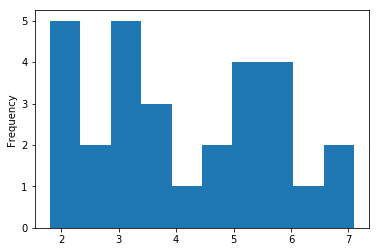

In [35]:
%matplotlib inline
df.diffc.plot.hist()

Объединим рубрики в *text* в одну строку через запятую:

In [36]:
df['rubric'] = [','.join(r) for r in df.rubric]

Давайте почистим текст новостей – уберем оттуда текст, не относящийся к новостям. Найдем лишнее:

In [37]:
df.text[0]

'В базе данных о регистрации гравитационных волн появилось новое событие-кандидат под номером S190408an. Это произошло спустя менее 10 дней после начала нового наблюдательного этапа работы американских антенн LIGO. На данный момент не было зафиксировано вспышки электромагнитного излучения из этого же направления — это значит, что наиболее вероятным объяснением является слияние черных дыр. 1 апреля начался новый сеанс поиска гравитационных волн на паре американских установок LIGO и европейской антенне Virgo. Обсерватории приступили к работе после обновления и повышения чувствительности, которое продолжалось в течение предыдущих 19 месяцев. Чувствительность аппаратуры существенно возросла, как и объем Вселенной, где слияния черных дыр породят заметное возмущение. Предварительные оптимистичные оценки показывали, что можно ожидать темпа регистрации на уровне одного события в неделю. Новое событие было зафиксировано в 18:18:02 по всемирному времени (21:18:02 по Москве) 8 апреля, спустя всег

Лишний текст находится после фразы 'Нашли опечатку?'. Так давайте будем разбивать строки по этой фразе с помощью метода `.split()` и брать все, что до нее (элемент с индексом 0).

In [38]:
df['clean_text'] = [t.split('Нашли опечатку?')[0] for t in df.text]

Осталось только заменить непонятные символы `\xa0` на пробелы:

In [39]:
df['clean_text'] = [t.replace("\xa0", " ") for t in df.clean_text]

In [40]:
df.clean_text[0]

'В базе данных о регистрации гравитационных волн появилось новое событие-кандидат под номером S190408an. Это произошло спустя менее 10 дней после начала нового наблюдательного этапа работы американских антенн LIGO. На данный момент не было зафиксировано вспышки электромагнитного излучения из этого же направления — это значит, что наиболее вероятным объяснением является слияние черных дыр. 1 апреля начался новый сеанс поиска гравитационных волн на паре американских установок LIGO и европейской антенне Virgo. Обсерватории приступили к работе после обновления и повышения чувствительности, которое продолжалось в течение предыдущих 19 месяцев. Чувствительность аппаратуры существенно возросла, как и объем Вселенной, где слияния черных дыр породят заметное возмущение. Предварительные оптимистичные оценки показывали, что можно ожидать темпа регистрации на уровне одного события в неделю. Новое событие было зафиксировано в 18:18:02 по всемирному времени (21:18:02 по Москве) 8 апреля, спустя всег

Всё! Сохраняем датафрейм в файл. Для разнообразия сохраним в Excel:

In [41]:
df.to_excel('nplus-news.xlsx')